In [1]:
import numpy as np
import pandas as pd
import scipy as sp

# Data preprocessing

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Regression Models

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

# Packages for model selection

In [4]:
from sklearn.model_selection import cross_validate, cross_val_score, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# To ignore warnings

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Model Deployment

In [6]:
import pickle

In [85]:
data=pd.read_csv('SecondCar.csv')
print(data.head(2))
data.shape

                             name  year  km_driven    fuel seller_type  \
0  Tata Indica Vista Aqua 1.4 TDI  2010     120000  Diesel  Individual   
1               Tata Nano Lx BSIV  2012      50000  Petrol  Individual   

  transmission         owner  Rating  ExShowroom Price  selling_price  
0       Manual  Second Owner     9.0            106001         100000  
1       Manual  Second Owner     9.0            108556         100000  


(4340, 10)

# Solution

In [8]:
data.iloc[0]

name                Tata Indica Vista Aqua 1.4 TDI
year                                          2010
km_driven                                   120000
fuel                                        Diesel
seller_type                             Individual
transmission                                Manual
owner                                 Second Owner
Rating                                           9
ExShowroom Price                            106001
selling_price                               100000
Name: 0, dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4340 non-null   object 
 1   year              4340 non-null   int64  
 2   km_driven         4340 non-null   int64  
 3   fuel              4337 non-null   object 
 4   seller_type       4338 non-null   object 
 5   transmission      4338 non-null   object 
 6   owner             4337 non-null   object 
 7   Rating            4336 non-null   float64
 8   ExShowroom Price  4340 non-null   int64  
 9   selling_price     4340 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 339.2+ KB


In [10]:
data.iloc[[0,1,2],[2,3,4]]

,km_driven,fuel,seller_type
0,120000,Diesel,Individual
1,50000,Petrol,Individual
2,70000,Diesel,Individual


In [11]:
data.mode()

,name,year,km_driven,fuel,seller_type,transmission,owner,Rating,ExShowroom Price,selling_price
0,Maruti Swift Dzire VDI,2017.0,70000.0,Diesel,Individual,Manual,First Owner,9.0,318101,300000.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,447196,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480502,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490675,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,517119,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,522530,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,553068,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574696,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003871,NaN


# Replacing Null Values Or NA Data With Median, Mode Values Of Data In Respective Columns

In [12]:
for col in data.columns:
    if data[col].dtype == 'int32' or data[col].dtype == 'int64' or data[col].dtype == 'float32' or data[col].dtype == 'float64':
        #median = data[col].median()
        data[col].fillna(data[col].median(), inplace= True)
        
    else:
        #print('Hello') 
        #input()
        data = data.fillna(data.mode().iloc[0])
        #print(col,end=" ")
data

,name,year,km_driven,fuel,seller_type,transmission,owner,Rating,ExShowroom Price,selling_price
0,Tata Indica Vista Aqua 1.4 TDI,2010,120000,Diesel,Individual,Manual,Second Owner,9.00,106001,100000
1,Tata Nano Lx BSIV,2012,50000,Petrol,Individual,Manual,Second Owner,9.00,108556,100000
2,Tata Indica Vista Aqua TDI BSIII,2011,70000,Diesel,Individual,Manual,First Owner,11.00,120678,120000
3,Maruti Wagon R LXI Minor,2010,80000,Petrol,Individual,Manual,Second Owner,9.00,122917,100000
4,Chevrolet Beat LT,2010,80000,Petrol,Individual,Manual,Second Owner,10.00,144902,130000
...,...,...,...,...,...,...,...,...,...,...
4335,BMW X5 xDrive 30d xLine,2019,30000,Diesel,Dealer,Automatic,First Owner,11.00,9407487,4950000
4336,BMW 5 Series 520d Luxury Line,2019,12999,Diesel,Dealer,Automatic,First Owner,9.71,9598350,4800000
4337,BMW X5 xDrive 30d xLine,2019,30000,Diesel,Dealer,Automatic,First Owner,11.00,9857238,4950000
4338,Audi RS7 2015-2019 Sportback Performance,2016,13000,Petrol,Dealer,Automatic,First Owner,14.09,14235729,8900000


In [13]:
data.median()

year                  2014.0
km_driven            60000.0
Rating                  12.0
ExShowroom Price    596055.0
selling_price       350000.0
dtype: float64

In [14]:
data.isna().sum() #API

name                0
year                0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
Rating              0
ExShowroom Price    0
selling_price       0
dtype: int64

In [15]:
data

,name,year,km_driven,fuel,seller_type,transmission,owner,Rating,ExShowroom Price,selling_price
0,Tata Indica Vista Aqua 1.4 TDI,2010,120000,Diesel,Individual,Manual,Second Owner,9.00,106001,100000
1,Tata Nano Lx BSIV,2012,50000,Petrol,Individual,Manual,Second Owner,9.00,108556,100000
2,Tata Indica Vista Aqua TDI BSIII,2011,70000,Diesel,Individual,Manual,First Owner,11.00,120678,120000
3,Maruti Wagon R LXI Minor,2010,80000,Petrol,Individual,Manual,Second Owner,9.00,122917,100000
4,Chevrolet Beat LT,2010,80000,Petrol,Individual,Manual,Second Owner,10.00,144902,130000
...,...,...,...,...,...,...,...,...,...,...
4335,BMW X5 xDrive 30d xLine,2019,30000,Diesel,Dealer,Automatic,First Owner,11.00,9407487,4950000
4336,BMW 5 Series 520d Luxury Line,2019,12999,Diesel,Dealer,Automatic,First Owner,9.71,9598350,4800000
4337,BMW X5 xDrive 30d xLine,2019,30000,Diesel,Dealer,Automatic,First Owner,11.00,9857238,4950000
4338,Audi RS7 2015-2019 Sportback Performance,2016,13000,Petrol,Dealer,Automatic,First Owner,14.09,14235729,8900000


In [16]:
data[data.isnull().any(axis=1)==True]

,name,year,km_driven,fuel,seller_type,transmission,owner,Rating,ExShowroom Price,selling_price


# Unique Value Check for categorial columns

In [17]:
data.nunique()

name                1491
year                  27
km_driven            770
fuel                   5
seller_type            3
transmission           2
owner                  5
Rating               566
ExShowroom Price    4331
selling_price        445
dtype: int64

In [18]:
len(data)

4340

In [19]:
len(data.columns[0])

4

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4340 non-null   object 
 1   year              4340 non-null   int64  
 2   km_driven         4340 non-null   int64  
 3   fuel              4340 non-null   object 
 4   seller_type       4340 non-null   object 
 5   transmission      4340 non-null   object 
 6   owner             4340 non-null   object 
 7   Rating            4340 non-null   float64
 8   ExShowroom Price  4340 non-null   int64  
 9   selling_price     4340 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 339.2+ KB


In [21]:
data

,name,year,km_driven,fuel,seller_type,transmission,owner,Rating,ExShowroom Price,selling_price
0,Tata Indica Vista Aqua 1.4 TDI,2010,120000,Diesel,Individual,Manual,Second Owner,9.00,106001,100000
1,Tata Nano Lx BSIV,2012,50000,Petrol,Individual,Manual,Second Owner,9.00,108556,100000
2,Tata Indica Vista Aqua TDI BSIII,2011,70000,Diesel,Individual,Manual,First Owner,11.00,120678,120000
3,Maruti Wagon R LXI Minor,2010,80000,Petrol,Individual,Manual,Second Owner,9.00,122917,100000
4,Chevrolet Beat LT,2010,80000,Petrol,Individual,Manual,Second Owner,10.00,144902,130000
...,...,...,...,...,...,...,...,...,...,...
4335,BMW X5 xDrive 30d xLine,2019,30000,Diesel,Dealer,Automatic,First Owner,11.00,9407487,4950000
4336,BMW 5 Series 520d Luxury Line,2019,12999,Diesel,Dealer,Automatic,First Owner,9.71,9598350,4800000
4337,BMW X5 xDrive 30d xLine,2019,30000,Diesel,Dealer,Automatic,First Owner,11.00,9857238,4950000
4338,Audi RS7 2015-2019 Sportback Performance,2016,13000,Petrol,Dealer,Automatic,First Owner,14.09,14235729,8900000


# Feature Engineering

In [22]:
data['company_name']=data['name'].str.split(' ').str[0]
data.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,Rating,ExShowroom Price,selling_price,company_name
0,Tata Indica Vista Aqua 1.4 TDI,2010,120000,Diesel,Individual,Manual,Second Owner,9.0,106001,100000,Tata
1,Tata Nano Lx BSIV,2012,50000,Petrol,Individual,Manual,Second Owner,9.0,108556,100000,Tata
2,Tata Indica Vista Aqua TDI BSIII,2011,70000,Diesel,Individual,Manual,First Owner,11.0,120678,120000,Tata
3,Maruti Wagon R LXI Minor,2010,80000,Petrol,Individual,Manual,Second Owner,9.0,122917,100000,Maruti
4,Chevrolet Beat LT,2010,80000,Petrol,Individual,Manual,Second Owner,10.0,144902,130000,Chevrolet


In [23]:
data['name'].str.split(' ').str[1]

0        Indica
1          Nano
2        Indica
3         Wagon
4          Beat
         ...   
4335         X5
4336          5
4337         X5
4338        RS7
4339    S-Class
Name: name, Length: 4340, dtype: object

In [24]:
data.company_name.unique()

array(['Tata', 'Maruti', 'Chevrolet', 'Hyundai', 'Ford', 'Volkswagen',
       'Mahindra', 'Fiat', 'Nissan', 'Renault', 'Toyota', 'Datsun',
       'Honda', 'Skoda', 'Ambassador', 'OpelCorsa', 'Daewoo', 'Force',
       'Mercedes-Benz', 'BMW', 'Audi', 'Mitsubishi', 'Jeep', 'Isuzu',
       'Kia', 'Volvo', 'Jaguar', 'MG', 'Land'], dtype=object)

In [25]:
data.company_name.nunique()

29

In [26]:
data.company_name.unique()

array(['Tata', 'Maruti', 'Chevrolet', 'Hyundai', 'Ford', 'Volkswagen',
       'Mahindra', 'Fiat', 'Nissan', 'Renault', 'Toyota', 'Datsun',
       'Honda', 'Skoda', 'Ambassador', 'OpelCorsa', 'Daewoo', 'Force',
       'Mercedes-Benz', 'BMW', 'Audi', 'Mitsubishi', 'Jeep', 'Isuzu',
       'Kia', 'Volvo', 'Jaguar', 'MG', 'Land'], dtype=object)

# Feature enginering for kilometers

In [27]:
km_ranges=['low','medium','high']
limits=[0,35000,100000,2000000]
data['km_range']=pd.cut(data['km_driven'],bins=limits,labels=km_ranges)

data.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,Rating,ExShowroom Price,selling_price,company_name,km_range
0,Tata Indica Vista Aqua 1.4 TDI,2010,120000,Diesel,Individual,Manual,Second Owner,9.0,106001,100000,Tata,high
1,Tata Nano Lx BSIV,2012,50000,Petrol,Individual,Manual,Second Owner,9.0,108556,100000,Tata,medium
2,Tata Indica Vista Aqua TDI BSIII,2011,70000,Diesel,Individual,Manual,First Owner,11.0,120678,120000,Tata,medium
3,Maruti Wagon R LXI Minor,2010,80000,Petrol,Individual,Manual,Second Owner,9.0,122917,100000,Maruti,medium
4,Chevrolet Beat LT,2010,80000,Petrol,Individual,Manual,Second Owner,10.0,144902,130000,Chevrolet,medium


In [28]:
round(data.describe(),0)

,year,km_driven,Rating,ExShowroom Price,selling_price
count,4340.0,4340.0,4340.0,4340.0,4340.0
mean,2013.0,66216.0,12.0,845381.0,504127.0
std,4.0,46644.0,2.0,884841.0,578549.0
min,1992.0,1.0,9.0,106001.0,20000.0
25%,2011.0,35000.0,10.0,445390.0,208750.0
50%,2014.0,60000.0,12.0,596055.0,350000.0
75%,2016.0,90000.0,14.0,946243.0,600000.0
max,2020.0,806599.0,15.0,15538153.0,8900000.0


In [29]:
data.describe()

,year,km_driven,Rating,ExShowroom Price,selling_price
count,4340.000000,4340.000000,4340.000000,4.340000e+03,4.340000e+03
mean,2013.090783,66215.777419,11.962984,8.453809e+05,5.041273e+05
std,4.215344,46644.102194,1.912088,8.848405e+05,5.785487e+05
min,1992.000000,1.000000,9.000000,1.060010e+05,2.000000e+04
25%,2011.000000,35000.000000,10.020000,4.453895e+05,2.087498e+05
50%,2014.000000,60000.000000,12.000000,5.960550e+05,3.500000e+05
75%,2016.000000,90000.000000,13.760000,9.462430e+05,6.000000e+05
max,2020.000000,806599.000000,15.000000,1.553815e+07,8.900000e+06


# Features For Years

In [30]:
year_ranges=['Junk','Scrap','Buy','Best']
limits=[1991,2005,2010,2015,2020]
data['year_range']=pd.cut(data['year'],bins=limits,labels=year_ranges)

data.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,Rating,ExShowroom Price,selling_price,company_name,km_range,year_range
0,Tata Indica Vista Aqua 1.4 TDI,2010,120000,Diesel,Individual,Manual,Second Owner,9.0,106001,100000,Tata,high,Scrap
1,Tata Nano Lx BSIV,2012,50000,Petrol,Individual,Manual,Second Owner,9.0,108556,100000,Tata,medium,Buy
2,Tata Indica Vista Aqua TDI BSIII,2011,70000,Diesel,Individual,Manual,First Owner,11.0,120678,120000,Tata,medium,Buy
3,Maruti Wagon R LXI Minor,2010,80000,Petrol,Individual,Manual,Second Owner,9.0,122917,100000,Maruti,medium,Scrap
4,Chevrolet Beat LT,2010,80000,Petrol,Individual,Manual,Second Owner,10.0,144902,130000,Chevrolet,medium,Scrap


# Feature for ex showroom price

In [31]:
ex_range=['Affordable','family','Luxury','Premium']
limits=[0,500000,1000000,1500000,20000000]
data['ex_range']=pd.cut(data['ExShowroom Price'],bins=limits,labels=ex_range)

data.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,Rating,ExShowroom Price,selling_price,company_name,km_range,year_range,ex_range
0,Tata Indica Vista Aqua 1.4 TDI,2010,120000,Diesel,Individual,Manual,Second Owner,9.0,106001,100000,Tata,high,Scrap,Affordable
1,Tata Nano Lx BSIV,2012,50000,Petrol,Individual,Manual,Second Owner,9.0,108556,100000,Tata,medium,Buy,Affordable
2,Tata Indica Vista Aqua TDI BSIII,2011,70000,Diesel,Individual,Manual,First Owner,11.0,120678,120000,Tata,medium,Buy,Affordable
3,Maruti Wagon R LXI Minor,2010,80000,Petrol,Individual,Manual,Second Owner,9.0,122917,100000,Maruti,medium,Scrap,Affordable
4,Chevrolet Beat LT,2010,80000,Petrol,Individual,Manual,Second Owner,10.0,144902,130000,Chevrolet,medium,Scrap,Affordable


# Label Encoding

In [32]:
data['fuel'].unique()

array(['Diesel', 'Petrol', 'CNG', 'LPG', 'Electric'], dtype=object)

In [33]:
EN=LabelEncoder()
data['fuel']=EN.fit_transform(data['fuel'])

data['fuel'].unique()

array([1, 4, 0, 3, 2])

In [34]:
data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [35]:
data['transmission']=EN.fit_transform(data['transmission'])
data['transmission'].unique()

array([1, 0])

In [36]:
data.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [37]:
data['name']=EN.fit_transform(data['name'])
data['seller_type']=EN.fit_transform(data['seller_type'])
data['owner']=EN.fit_transform(data['owner'])
data['company_name']=EN.fit_transform(data['company_name'])
data['km_range']=EN.fit_transform(data['km_range'])
data['year_range']=EN.fit_transform(data['year_range'])
data['ex_range']=EN.fit_transform(data['ex_range'])

data.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,Rating,ExShowroom Price,selling_price,company_name,km_range,year_range,ex_range
0,1228,2010,120000,1,1,1,2,9.0,106001,100000,25,0,3,0
1,1283,2012,50000,4,1,1,2,9.0,108556,100000,25,2,1,0
2,1229,2011,70000,1,1,1,0,11.0,120678,120000,25,2,1,0
3,1041,2010,80000,4,1,1,2,9.0,122917,100000,18,2,3,0
4,56,2010,80000,4,1,1,2,10.0,144902,130000,3,2,3,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4340 non-null   int32  
 1   year              4340 non-null   int64  
 2   km_driven         4340 non-null   int64  
 3   fuel              4340 non-null   int32  
 4   seller_type       4340 non-null   int32  
 5   transmission      4340 non-null   int32  
 6   owner             4340 non-null   int32  
 7   Rating            4340 non-null   float64
 8   ExShowroom Price  4340 non-null   int64  
 9   selling_price     4340 non-null   int64  
 10  company_name      4340 non-null   int32  
 11  km_range          4340 non-null   int32  
 12  year_range        4340 non-null   int32  
 13  ex_range          4340 non-null   int32  
dtypes: float64(1), int32(9), int64(4)
memory usage: 322.2 KB


# Correlation: range(-1 to +1)

In [39]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,name,year,km_driven,fuel,seller_type,transmission,owner,Rating,ExShowroom Price,selling_price,company_name,km_range,year_range,ex_range
name,1.000000,-0.051902,0.126203,-0.083850,0.140802,0.087785,0.032819,0.020311,-0.068402,-0.077598,0.974513,-0.043286,0.044957,0.004140
year,-0.051902,1.000000,-0.419688,-0.120528,-0.098352,-0.143800,-0.414705,-0.003809,0.304871,0.413922,-0.039724,-0.009183,-0.835377,0.075024
km_driven,0.126203,-0.419688,1.000000,-0.285634,0.113689,0.120226,0.297115,-0.003163,-0.165105,-0.192289,0.131461,-0.350032,0.410429,-0.045346
fuel,-0.083850,-0.120528,-0.285634,1.000000,0.038387,0.040445,-0.010301,-0.012126,-0.234674,-0.269779,-0.109394,0.081334,0.114757,-0.119162
seller_type,0.140802,-0.098352,0.113689,0.038387,1.000000,0.174925,0.165681,-0.005921,-0.132745,-0.151554,0.144218,-0.067877,0.106460,-0.064461
transmission,0.087785,-0.143800,0.120226,0.040445,0.174925,1.000000,0.078893,0.024621,-0.516677,-0.530205,0.110699,0.009729,0.134621,-0.103924
owner,0.032819,-0.414705,0.297115,-0.010301,0.165681,0.078893,1.000000,0.007293,-0.167726,-0.207840,0.036452,-0.060049,0.399134,-0.087054
Rating,0.020311,-0.003809,-0.003163,-0.012126,-0.005921,0.024621,0.007293,1.000000,-0.000455,-0.021932,0.023503,0.022934,0.005299,0.075524
ExShowroom Price,-0.068402,0.304871,-0.165105,-0.234674,-0.132745,-0.516677,-0.167726,-0.000455,1.000000,0.960629,-0.087559,-0.030755,-0.278399,0.183587
selling_price,-0.077598,0.413922,-0.192289,-0.269779,-0.151554,-0.530205,-0.207840,-0.021932,0.960629,1.000000,-0.096858,-0.028493,-0.376538,0.165696


In [40]:
data=data.drop(['name','ExShowroom Price'],axis=1)
data.head(2)

,year,km_driven,fuel,seller_type,transmission,owner,Rating,selling_price,company_name,km_range,year_range,ex_range
0,2010,120000,1,1,1,2,9.0,100000,25,0,3,0
1,2012,50000,4,1,1,2,9.0,100000,25,2,1,0


# Define X & Y

In [41]:
X=data.drop('selling_price',axis=1)
y=data.selling_price

In [42]:
X

,year,km_driven,fuel,seller_type,transmission,owner,Rating,company_name,km_range,year_range,ex_range
0,2010,120000,1,1,1,2,9.00,25,0,3,0
1,2012,50000,4,1,1,2,9.00,25,2,1,0
2,2011,70000,1,1,1,0,11.00,25,2,1,0
3,2010,80000,4,1,1,2,9.00,18,2,3,0
4,2010,80000,4,1,1,2,10.00,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
4335,2019,30000,1,0,0,0,11.00,2,1,0,2
4336,2019,12999,1,0,0,0,9.71,2,1,0,2
4337,2019,30000,1,0,0,0,11.00,2,1,0,2
4338,2016,13000,4,0,0,0,14.09,1,1,0,2


In [43]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner,Rating,company_name,km_range,year_range,ex_range
0,2010,120000,1,1,1,2,9.0,25,0,3,0
1,2012,50000,4,1,1,2,9.0,25,2,1,0
2,2011,70000,1,1,1,0,11.0,25,2,1,0
3,2010,80000,4,1,1,2,9.0,18,2,3,0
4,2010,80000,4,1,1,2,10.0,3,2,3,0


In [44]:
y.head()

0    100000
1    100000
2    120000
3    100000
4    130000
Name: selling_price, dtype: int64

# Data Scaling

In [45]:
round(X.describe(),2)

,year,km_driven,fuel,seller_type,transmission,owner,Rating,company_name,km_range,year_range,ex_range
count,4340.00,4340.00,4340.00,4340.00,4340.0,4340.00,4340.00,4340.00,4340.00,4340.00,4340.00
mean,2013.09,66215.78,2.47,0.79,0.9,0.82,11.96,15.56,1.40,1.10,1.61
std,4.22,46644.10,1.51,0.46,0.3,1.23,1.91,6.81,0.76,1.06,1.34
min,1992.00,1.00,0.00,0.00,0.0,0.00,9.00,0.00,0.00,0.00,0.00
25%,2011.00,35000.00,1.00,1.00,1.0,0.00,10.02,10.00,1.00,0.00,0.00
50%,2014.00,60000.00,1.00,1.00,1.0,0.00,12.00,18.00,2.00,1.00,2.00
75%,2016.00,90000.00,4.00,1.00,1.0,2.00,13.76,18.00,2.00,1.00,3.00
max,2020.00,806599.00,4.00,2.00,1.0,4.00,15.00,28.00,2.00,3.00,3.00


In [46]:
all_x=list(X.columns)
X[all_x]=X[all_x]/(X[all_x].max())
round(X.describe(),2)

,year,km_driven,fuel,seller_type,transmission,owner,Rating,company_name,km_range,year_range,ex_range
count,4340.00,4340.00,4340.00,4340.00,4340.0,4340.00,4340.00,4340.00,4340.00,4340.00,4340.00
mean,1.00,0.08,0.62,0.40,0.9,0.21,0.80,0.56,0.70,0.37,0.54
std,0.00,0.06,0.38,0.23,0.3,0.31,0.13,0.24,0.38,0.35,0.45
min,0.99,0.00,0.00,0.00,0.0,0.00,0.60,0.00,0.00,0.00,0.00
25%,1.00,0.04,0.25,0.50,1.0,0.00,0.67,0.36,0.50,0.00,0.00
50%,1.00,0.07,0.25,0.50,1.0,0.00,0.80,0.64,1.00,0.33,0.67
75%,1.00,0.11,1.00,0.50,1.0,0.50,0.92,0.64,1.00,0.33,1.00
max,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00


In [47]:
X.head(5)

,year,km_driven,fuel,seller_type,transmission,owner,Rating,company_name,km_range,year_range,ex_range
0,0.995050,0.148773,0.25,0.5,1.0,0.5,0.600000,0.892857,0.0,1.000000,0.0
1,0.996040,0.061989,1.00,0.5,1.0,0.5,0.600000,0.892857,1.0,0.333333,0.0
2,0.995545,0.086784,0.25,0.5,1.0,0.0,0.733333,0.892857,1.0,0.333333,0.0
3,0.995050,0.099182,1.00,0.5,1.0,0.5,0.600000,0.642857,1.0,1.000000,0.0
4,0.995050,0.099182,1.00,0.5,1.0,0.5,0.666667,0.107143,1.0,1.000000,0.0


# Dividing Dataset Into Training And Testing Data

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

print(len(X_train))
print(len(X_test))
#print((X_train))
#print((X_test))

3038
1302


In [49]:
print(X_test)

          year  km_driven  fuel  seller_type  transmission  owner    Rating  \
3866  0.997030   0.167369  0.25          0.5           0.0   1.00  0.666667   
909   0.998515   0.018597  1.00          0.0           1.0   0.50  0.759333   
1866  0.996040   0.037193  1.00          0.5           1.0   0.50  0.607333   
1532  0.996040   0.193405  0.25          0.5           1.0   0.00  0.933333   
1028  0.997030   0.079345  1.00          0.5           1.0   0.50  0.600000   
...        ...        ...   ...          ...           ...    ...       ...   
2595  0.993069   0.099182  1.00          0.5           0.0   0.25  0.800000   
1775  0.989109   0.043392  0.75          0.5           1.0   0.50  0.600000   
4019  0.998515   0.024795  1.00          0.0           0.0   0.50  1.000000   
2762  0.998515   0.039673  0.25          0.5           1.0   0.50  0.864000   
2890  0.998515   0.049591  0.25          0.5           1.0   0.00  0.866667   

      company_name  km_range  year_range  ex_range 

In [50]:
print(len(y_train))
print(len(y_test))

3038
1302


# Data Preprocessing Ends Here

# Regression

# Step 1: Polynomial Feature Creation

In [51]:
poly_reg=PolynomialFeatures(degree=2)
X_train_p=poly_reg.fit_transform(X_train)
X_test_p=poly_reg.fit_transform(X_test)

In [52]:
total_columns=len(X_train_p[0])
print(total_columns)

78


# Method 1: Linear Regression



In [53]:
########## Define Model #################
model=LinearRegression()

########## Fit the train data ##############

model.fit(X_train, y_train)


########### Predict The values ##############
y_pred=model.predict(X_test)

In [54]:
y_pred

array([1297399.91739812,  499911.36079103,  344915.339976  , ...,
       1307872.34000459,  728933.64981447,  730930.53872418])

In [55]:
y_test

3866    1200000
909      210000
1866     280000
1532     250000
1028     290000
         ...   
2595     275000
1775      50000
4019     850000
2762     610000
2890     409999
Name: selling_price, Length: 1302, dtype: int64

In [56]:
accuracy=r2_score(y_test,y_pred)*100

In [57]:
round(accuracy,2)

47.45

# Method 1(a): Linear Regression With Polynomial Data

In [58]:
########## Define Model #################
model=LinearRegression()

########## Fit the train data ##############

model.fit(X_train_p, y_train)


########### Predict The values ##############
y_pred=model.predict(X_test_p)

accuracy=r2_score(y_test,y_pred)*100
print(round(accuracy,2))

importance=model.coef_
for i,j in enumerate(importance):
    print('Feature: %d, Score: %.1f'%(i,j))

58.33
Feature: 0, Score: 0.0
Feature: 1, Score: -10255241300.7
Feature: 2, Score: -8716354.8
Feature: 3, Score: 49732389.1
Feature: 4, Score: 65750263.7
Feature: 5, Score: 65423716778274963456.0
Feature: 6, Score: 19637690.1
Feature: 7, Score: 41505408.8
Feature: 8, Score: 36691648.3
Feature: 9, Score: -22693888.0
Feature: 10, Score: -91410432.0
Feature: 11, Score: -38797312.0
Feature: 12, Score: 5201222304.0
Feature: 13, Score: -3433984.0
Feature: 14, Score: -49823488.0
Feature: 15, Score: -67005440.0
Feature: 16, Score: -15101952.0
Feature: 17, Score: -19974656.0
Feature: 18, Score: -43613184.0
Feature: 19, Score: -36705280.0
Feature: 20, Score: 21721088.0
Feature: 21, Score: 91779072.0
Feature: 22, Score: 42155008.0
Feature: 23, Score: 2269312.0
Feature: 24, Score: -212112.0
Feature: 25, Score: 3035648.0
Feature: 26, Score: 4048384.0
Feature: 27, Score: 1617152.0
Feature: 28, Score: 7772416.0
Feature: 29, Score: -581120.0
Feature: 30, Score: 3701504.0
Feature: 31, Score: -1503680.0


# Method 2: Ridge Regression

In [59]:
########## Define Model #################
model=Ridge()

########## Fit the train data ##############

model.fit(X_train_p, y_train)

########### Predict The values ##############

y_pred=model.predict(X_test_p)

########### Accuracy ####################
accuracy=r2_score(y_test,y_pred)*100
print(round(accuracy,2))


importance=model.coef_
for i,j in enumerate(importance):
    print('Feature: %d, Score: %.1f'%(i,j))

68.21
Feature: 0, Score: 0.0
Feature: 1, Score: 107965.1
Feature: 2, Score: -480350.7
Feature: 3, Score: -424463.9
Feature: 4, Score: -391530.4
Feature: 5, Score: -644156.1
Feature: 6, Score: -148499.9
Feature: 7, Score: -83242.8
Feature: 8, Score: -280250.5
Feature: 9, Score: -44286.6
Feature: 10, Score: -595394.1
Feature: 11, Score: 1222295.7
Feature: 12, Score: 214882.4
Feature: 13, Score: -470159.3
Feature: 14, Score: -371803.7
Feature: 15, Score: -358370.1
Feature: 16, Score: -562404.5
Feature: 17, Score: -123042.9
Feature: 18, Score: -150.0
Feature: 19, Score: -230121.5
Feature: 20, Score: 33850.7
Feature: 21, Score: -538996.1
Feature: 22, Score: 1304482.0
Feature: 23, Score: -40187.3
Feature: 24, Score: 339346.1
Feature: 25, Score: 239737.7
Feature: 26, Score: 983186.0
Feature: 27, Score: 270975.9
Feature: 28, Score: -243163.1
Feature: 29, Score: 216959.6
Feature: 30, Score: -59758.3
Feature: 31, Score: -51925.9
Feature: 32, Score: -315657.7
Feature: 33, Score: -318874.8
Feature

# Method 3: Lasso Regression

In [60]:
########## Define Model #################
model=Lasso()

########## Fit the train data ##############

model.fit(X_train_p, y_train)


########### Predict The values ##############

y_pred=model.predict(X_test_p)

########### Accuracy ####################
accuracy=r2_score(y_test,y_pred)*100
print(round(accuracy,2))


69.41


# Method 4: ElasticNet

In [61]:
########## Define Model #################
model=ElasticNet()

########## Fit the train data ##############

model.fit(X_train_p, y_train)


########### Predict The values ##############

y_pred=model.predict(X_test_p)

########### Accuracy ####################
accuracy=r2_score(y_test,y_pred)*100
print(round(accuracy,2))



34.99


# Method 5:KNeighbour Regression

In [62]:
########## Define Model #################
model=KNeighborsRegressor()

########## Fit the train data ##############

model.fit(X_train_p, y_train)


########### Predict The values ##############

y_pred=model.predict(X_test_p)

########### Accuracy ####################
accuracy=r2_score(y_test,y_pred)*100
print(round(accuracy,2))


75.76


# Method 6: Support Vector Regression

In [63]:
########## Define Model #################
model=SVR()

########## Fit the train data ##############

model.fit(X_train_p, y_train)


########### Predict The values ##############

y_pred=model.predict(X_test_p)

########### Accuracy ####################
accuracy=r2_score(y_test,y_pred)*100
print(round(accuracy,2))


-6.12


# Method 7: Random Forest Regression

In [64]:
########## Define Model #################
model=RandomForestRegressor()

########## Fit the train data ##############

model.fit(X_train_p, y_train)


########### Predict The values ##############

y_pred=model.predict(X_test_p)

########### Accuracy ####################
accuracy=r2_score(y_test,y_pred)*100
print(round(accuracy,2))


84.74


# Method 8: Decision Tree Regression

In [65]:
########## Define Model #################
model=DecisionTreeRegressor()

########## Fit the train data ##############

model.fit(X_train_p, y_train)


########### Predict The values ##############

y_pred=model.predict(X_test_p)

########### Accuracy ####################
accuracy=r2_score(y_test,y_pred)*100
print(round(accuracy,2))


74.31


# Method 9: Bagging Regression

In [66]:
########## Define Model #################
model=BaggingRegressor()

########## Fit the train data ##############

model.fit(X_train_p, y_train)


########### Predict The values ##############

y_pred=model.predict(X_test_p)

########### Accuracy ####################
accuracy=r2_score(y_test,y_pred)*100
print(round(accuracy,2))


82.63


# Deplyment Of Most Accurate Model

In [67]:
#Step 1: Save the model

################ Define The Most Accurate Model ############

model=RandomForestRegressor()
model.fit(X_train_p,y_train)

filename='Most_Accurate_Reg_Model.sav'
pickle.dump(model,open(file=filename,mode='wb'))

In [68]:
#Step 2: Use the saved model


model_load=pickle.load(open(file=filename,mode='rb'))

y_pred=model_load.predict(X_test_p[15:16])

############ Write A Data Preproceess ##############

print(y_pred)

[557859.99]


In [69]:
X_test.iloc[15:16]

,year,km_driven,fuel,seller_type,transmission,owner,Rating,company_name,km_range,year_range,ex_range
2736,0.998515,0.148773,0.25,0.5,1.0,0.0,0.6,0.607143,0.0,0.0,1.0


In [70]:
data.iloc[2736]

year               2017.0
km_driven        120000.0
fuel                  1.0
seller_type           1.0
transmission          1.0
owner                 0.0
Rating                9.0
selling_price    628000.0
company_name         17.0
km_range              0.0
year_range            0.0
ex_range              3.0
Name: 2736, dtype: float64

In [71]:
y_pred=model_load.predict(X_test_p[25:26])
print(y_pred)

[88870.]


In [72]:
X_test.iloc[25:26]

,year,km_driven,fuel,seller_type,transmission,owner,Rating,company_name,km_range,year_range,ex_range
1603,0.994059,0.148773,1.0,0.5,1.0,1.0,0.970667,0.642857,0.0,1.0,1.0


In [73]:
data.iloc[1603]

year               2008.00
km_driven        120000.00
fuel                  4.00
seller_type           1.00
transmission          1.00
owner                 4.00
Rating               14.56
selling_price    110000.00
company_name         18.00
km_range              0.00
year_range            3.00
ex_range              3.00
Name: 1603, dtype: float64

In [74]:
y_pred=model_load.predict(X_test_p[0:1])
print(y_pred)

[784840.]


In [75]:
X_test.iloc[0:1]

,year,km_driven,fuel,seller_type,transmission,owner,Rating,company_name,km_range,year_range,ex_range
3866,0.99703,0.167369,0.25,0.5,0.0,1.0,0.666667,0.857143,0.0,0.333333,0.333333


In [76]:
data.iloc[3866]

year                2014.0
km_driven         135000.0
fuel                   1.0
seller_type            1.0
transmission           0.0
owner                  4.0
Rating                10.0
selling_price    1200000.0
company_name          24.0
km_range               0.0
year_range             1.0
ex_range               1.0
Name: 3866, dtype: float64

In [77]:
y_pred=model_load.predict(X_test_p[7:8])
print(y_pred)

[600430.]


In [78]:
X_test.iloc[7:8]

,year,km_driven,fuel,seller_type,transmission,owner,Rating,company_name,km_range,year_range,ex_range
3265,0.99802,0.099171,0.25,0.0,1.0,0.0,0.6,0.642857,1.0,0.0,1.0


In [79]:
data.iloc[3265]

year               2016.0
km_driven         79991.0
fuel                  1.0
seller_type           0.0
transmission          1.0
owner                 0.0
Rating                9.0
selling_price    701000.0
company_name         18.0
km_range              2.0
year_range            0.0
ex_range              3.0
Name: 3265, dtype: float64

In [80]:
table = data.groupby(by='company_name').agg('count')
print(table)

              year  km_driven  fuel  seller_type  transmission  owner  Rating  \
company_name                                                                    
0                4          4     4            4             4      4       4   
1               60         60    60           60            60     60      60   
2               39         39    39           39            39     39      39   
3              188        188   188          188           188    188     188   
4                1          1     1            1             1      1       1   
5               37         37    37           37            37     37      37   
6               37         37    37           37            37     37      37   
7                1          1     1            1             1      1       1   
8              238        238   238          238           238    238     238   
9              252        252   252          252           252    252     252   
10             821        82

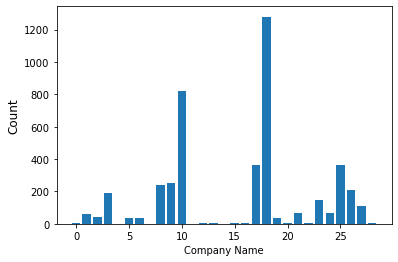

In [81]:
table=data.groupby(by='company_name').agg('count')
x=data.company_name.unique()
x=list(x)
x.sort()
y=table['year']
plt.xlabel('Company Name', fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.bar(x,y)
plt.savefig('C:/Users/ACER/Desktop/miniproject/SecondCarProject/static/images/bar1.png',bbox_inches="tight",pad_inches=2,transparent=True)
plt.show()

      km_driven  fuel  seller_type  transmission  owner  Rating  \
year                                                              
1992          1     1            1             1      1       1   
1995          1     1            1             1      1       1   
1996          2     2            2             2      2       2   
1997          3     3            3             3      3       3   
1998         12    12           12            12     12      12   
1999         10    10           10            10     10      10   
2000         12    12           12            12     12      12   
2001         20    20           20            20     20      20   
2002         21    21           21            21     21      21   
2003         23    23           23            23     23      23   
2004         42    42           42            42     42      42   
2005         85    85           85            85     85      85   
2006        110   110          110           110    110     11

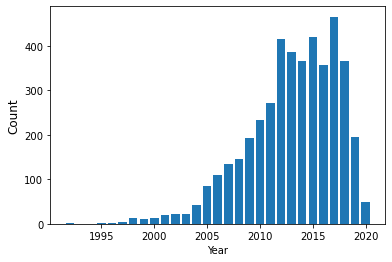

In [82]:
table=data.groupby(by='year').agg('count')
print(table)
x=data.year.unique()
x=list(x)
x.sort()
y=table['fuel']
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.bar(x,y)
#for i in range(len(x)):
    # plt.text(i, y[i], "Hello", ha="center" , va="bottom")
plt.savefig('C:/Users/ACER/Desktop/miniproject/SecondCarProject/static/images/bar2.png',bbox_inches="tight",pad_inches=2,transparent=True)
plt.show()

In [83]:
y=data['fuel']
y
x=data.fuel.unique();
x

array([1, 4, 0, 3, 2])

fuel
CNG           40
Diesel      2152
Electric       1
LPG           23
Petrol      2121
Name: km_driven, dtype: int64
[0, 1, 2, 3, 4]


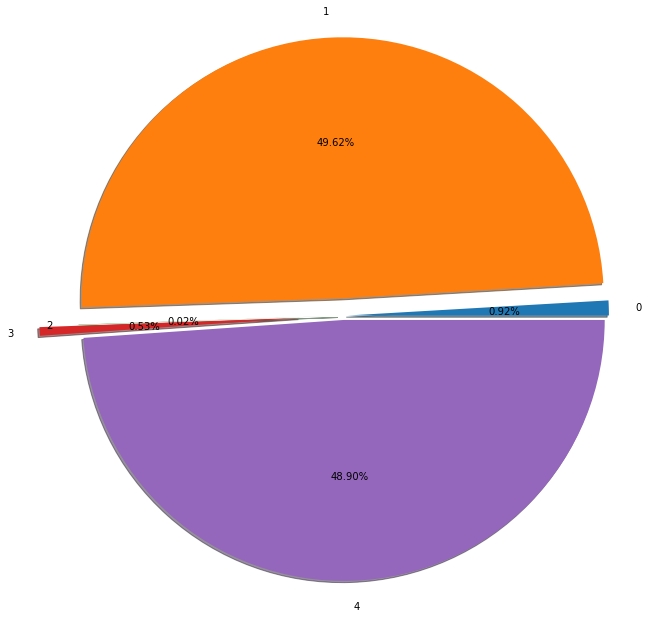

In [86]:
table=data.groupby(by='fuel').agg('count')
y=table['km_driven']
print(y)
x=list(x)
x.sort()
print(x)
plt.pie(y,labels=x,radius=3,autopct='%0.02f%%', shadow=True, explode=[.05,.2,.05,.5,.05])
plt.savefig('C:/Users/ACER/Desktop/miniproject/SecondCarProject/static/images/pie1.png',bbox_inches="tight",pad_inches=2,transparent=True)
plt.show()